In [1]:
%matplotlib notebook
%matplotlib inline
# Import Dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Merge cleaned files together, update the merged files to include bins by age group, add the ICD9 codes

In [2]:
# import and read file 1 (the cleaned inpatient file)
inptdata = "NewInpt.csv"
inptdata_df = pd.read_csv(inptdata)

# import and read file 2 (the cleaned outpatient file)
outptdata = "NewOutpt.csv"
outptdata_df = pd.read_csv(outptdata)

# import and read file 3 (the cleaned beneficiary file)
demdata = "NewBen.csv"
demdata_df = pd.read_csv(demdata)
demdata_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,total_costs,SSA,STATE,COUNTY,FIPS
0,00013D2EFD8E45D1,19230501,NaN,Male,White,60.0,26950,MO,St. Louis city,29510
1,0BE2D12CF2858F0B,19391101,NaN,Male,White,1610.0,26950,MO,St. Louis city,29510
2,142A913C2779CD0F,19330901,NaN,Female,White,1510.0,26950,MO,St. Louis city,29510
3,1C8C203E38E10DA6,19130701,NaN,Male,White,0.0,26950,MO,St. Louis city,29510
4,20A0E77C75D93012,19391001,NaN,Male,White,0.0,26950,MO,St. Louis city,29510


In [3]:
# merge file 1, 2, 3 (the cleaned inpatient and the cleaned outpatient file)
inoutptdata_df = pd.merge(inptdata_df, outptdata_df, how='outer', left_on=['DESYNPUF_ID', 'CLM_ID', 'ADMTNG_ICD9_DGNS_CD', 'DG', 'type'], right_on = ['DESYNPUF_ID', 'CLM_ID', 'ADMTNG_ICD9_DGNS_CD', 'DG', 'type'])
inoutptdem_df = pd.merge(demdata_df, inoutptdata_df, how='outer', left_on=['DESYNPUF_ID'], right_on = ['DESYNPUF_ID'])
inoutptdem_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,total_costs,SSA,STATE,COUNTY,FIPS,CLM_ID,ADMTNG_ICD9_DGNS_CD,DG,type
0,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,V5841,outpatient
1,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient
2,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient
3,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient
4,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient


In [4]:
# add bins by age groups to the merged files and remove patient without a birth date provided
inoutptdem_df["BENE_BIRTH_DT"] = inoutptdem_df["BENE_BIRTH_DT"].astype(str)
inoutptdem_df['year'] = inoutptdem_df["BENE_BIRTH_DT"].str[0:4]
inoutptdem_df = inoutptdem_df[~inoutptdem_df["BENE_BIRTH_DT"].isin(["NaN", "nan"])]

inoutptdem_df["year"] = pd.to_numeric(inoutptdem_df["year"])
currentdate = 2008
inoutptdem_df["age"] = currentdate - inoutptdem_df["year"]

bins = [0, 69, 74, 79, 84, 89, 94, 110]
age_groups = ["65-69", "70-74", "75-79", "80-84", "85-90", "90-94", "95+"]
inoutptdem_df["age_groups"] = pd.cut(inoutptdem_df["age"], bins, labels = age_groups)
inoutptdem_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,total_costs,SSA,STATE,COUNTY,FIPS,CLM_ID,ADMTNG_ICD9_DGNS_CD,DG,type,year,age,age_groups
0,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,V5841,outpatient,1923,85,85-90
1,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient,1923,85,85-90
2,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient,1923,85,85-90
3,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient,1923,85,85-90
4,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,5.421923e+14,V5883,NaN,outpatient,1923,85,85-90


In [5]:
# import and read file 4 (the ICD9 codes file)
icd = "ICD91.csv"
icd_df = pd.read_csv('ICD91.csv')

In [6]:
# merge file 4 with merged files 1,2,3 so that the ICD9 codes to the diagnosis verbal
admtngdg_df = pd.merge(inoutptdem_df, icd_df, how='outer', left_on=['ADMTNG_ICD9_DGNS_CD'], right_on = ['CODE'])
final_df = pd.merge(admtngdg_df, icd_df, how='outer', left_on=['DG'], right_on = ['CODE'])
final_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,total_costs,SSA,STATE,COUNTY,FIPS,...,ADMTNG_ICD9_DGNS_CD,DG,type,year,age,age_groups,CODE_x,DESCRIPTION_x,CODE_y,DESCRIPTION_y
0,00013D2EFD8E45D1,19230501.0,NaN,Male,White,60.0,26950.0,MO,St. Louis city,29510.0,...,V5883,V5841,outpatient,1923.0,85.0,85-90,V5883,Encounter for therapeutic drug monitoring,V5841,Encounter for planned post-operative wound clo...
1,8D5FA74A9494C0A4,19390301.0,NaN,Female,White,2470.0,33700.0,NY,Suffolk County,36103.0,...,V5883,V5841,outpatient,1939.0,69.0,65-69,V5883,Encounter for therapeutic drug monitoring,V5841,Encounter for planned post-operative wound clo...
2,0379FCFB89265CCE,19340501.0,NaN,Female,Black,3670.0,39620.0,PA,Philadelphia County,42101.0,...,V5883,V5841,outpatient,1934.0,74.0,70-74,V5883,Encounter for therapeutic drug monitoring,V5841,Encounter for planned post-operative wound clo...
3,4A85C5D652D801DD,19220201.0,NaN,Female,White,5140.0,39560.0,PA,Montgomery County,42091.0,...,V5883,V5841,outpatient,1922.0,86.0,85-90,V5883,Encounter for therapeutic drug monitoring,V5841,Encounter for planned post-operative wound clo...
4,5F5C4E16151645FD,19211101.0,NaN,Female,White,6934.0,44320.0,TN,Hamilton County,47065.0,...,V5883,V5841,outpatient,1921.0,87.0,85-90,V5883,Encounter for therapeutic drug monitoring,V5841,Encounter for planned post-operative wound clo...


# Choose ICD9 code here 

In [7]:
# Search for data with a particular diagnosis
diag_codes = ["42731"]
dg_count_df = final_df[final_df['ADMTNG_ICD9_DGNS_CD'].isin(diag_codes) | final_df['DG'].isin(diag_codes)]
dg_count_df.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,total_costs,SSA,STATE,COUNTY,FIPS,...,ADMTNG_ICD9_DGNS_CD,DG,type,year,age,age_groups,CODE_x,DESCRIPTION_x,CODE_y,DESCRIPTION_y
808432,4DB53577A7CB8597,19401101.0,NaN,Male,White,1710.0,26950.0,MO,St. Louis city,29510.0,...,42731,NaN,outpatient,1940.0,68.0,65-69,42731,Atrial fibrillation,NaN,NaN
808433,4DB53577A7CB8597,19401101.0,NaN,Male,White,1710.0,26950.0,MO,St. Louis city,29510.0,...,42731,NaN,outpatient,1940.0,68.0,65-69,42731,Atrial fibrillation,NaN,NaN
808434,4DB53577A7CB8597,19401101.0,NaN,Male,White,1710.0,26950.0,MO,St. Louis city,29510.0,...,42731,NaN,outpatient,1940.0,68.0,65-69,42731,Atrial fibrillation,NaN,NaN
808435,4DB53577A7CB8597,19401101.0,NaN,Male,White,1710.0,26950.0,MO,St. Louis city,29510.0,...,42731,NaN,outpatient,1940.0,68.0,65-69,42731,Atrial fibrillation,NaN,NaN
808436,4DB53577A7CB8597,19401101.0,NaN,Male,White,1710.0,26950.0,MO,St. Louis city,29510.0,...,42731,NaN,outpatient,1940.0,68.0,65-69,42731,Atrial fibrillation,NaN,NaN


# 1 -  Percent of patients with atrial fibrillation by age group

In [8]:
# Percent of AF Patients by Age Group
df = final_df
pt_count = df.DESYNPUF_ID.nunique()

age = df[['DESYNPUF_ID', 'age_groups']]
age = age.sort_values("DESYNPUF_ID")
age = age.drop_duplicates(subset="DESYNPUF_ID", keep="first")
age = age.reset_index(drop=True)
age = age.groupby(["age_groups"]).agg({'DESYNPUF_ID':'count'}).rename(columns={'DESYNPUF_ID':"Total Count"})
age['Percent'] = age['Total Count']/pt_count
age

,Total Count,Percent
age_groups,,
65-69,14941,0.219231
70-74,16485,0.241886
75-79,14049,0.206142
80-84,11304,0.165865
85-90,7164,0.105118
90-94,2117,0.031063
95+,2092,0.030696


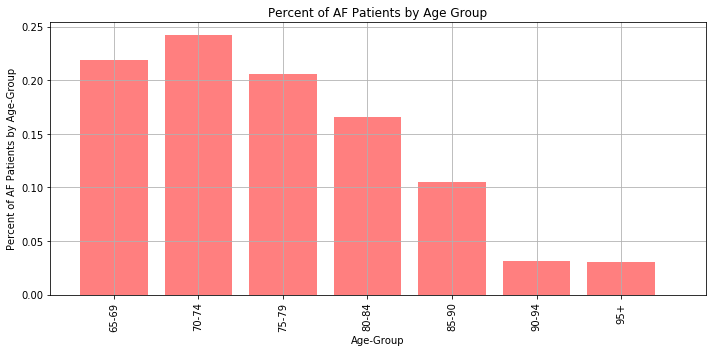

In [9]:
# Plot the Percent of AF Patients by Age Group
x_axis = np.arange(len(age))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, age["Percent"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, ('65-69', '70-74', '75-79', '80-84', '85-90', '90-94', '95+'), rotation="vertical")
plt.xlim(-.75, len(x_axis))
plt.title("Percent of AF Patients by Age Group")
plt.xlabel("Age-Group")
plt.ylabel("Percent of AF Patients by Age-Group")
plt.tight_layout()
plt.grid()
plt.show()

# 2 - Percent of males vs female with atrial fibrillation

In [10]:
# Find the Percent of AF Patients by Gender
gender = df[['DESYNPUF_ID', 'BENE_SEX_IDENT_CD']]
gender = gender.drop_duplicates()
gender = gender.dropna(how='any')
gender['Counts'] = gender.groupby(['BENE_SEX_IDENT_CD']).transform('count')
gender = gender.drop(columns='DESYNPUF_ID')
gender = gender.drop_duplicates()
gender['Percent'] = gender['Counts']/pt_count
gender['Percent'] = gender['Percent'].astype(float).map(lambda n: '{:.2%}'.format(n))
gender

,BENE_SEX_IDENT_CD,Counts,Percent
0,Male,28424,41.71%
1,Female,39728,58.29%


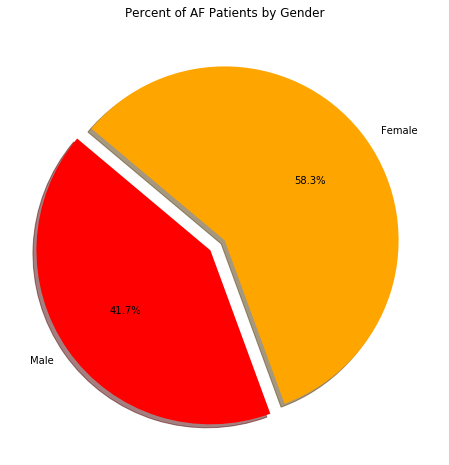

In [11]:
# Plot the Percent of AF Patients by Gender
gender_counts = gender['Counts']
gender_explode = (0.1, 0)
gender_colors = ["red", "orange"]
gender_labels = gender['BENE_SEX_IDENT_CD']
plt.figure(figsize=(20,8))
plt.pie(gender_counts, explode=gender_explode, labels=gender_labels, colors=gender_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percent of AF Patients by Gender")
plt.show()

# 3 - Percent of patients with atrial fibrillation by state location

In [12]:
# Find the Percent of AF Patients by State Locations
state = df[['DESYNPUF_ID', 'STATE']]
state = state.drop_duplicates()
state['Counts'] = state.groupby(['STATE']).transform('count')
state = state.drop(columns='DESYNPUF_ID')
state = state.drop_duplicates()
state = state.sort_values('Counts', ascending=False)
state['Percent'] = state['Counts']/pt_count
state.head(10)

,STATE,Counts,Percent
28,CA,7058.0,0.103563
5,FL,4784.0,0.070196
10,TX,4599.0,0.067482
1,NY,4063.0,0.059617
2,PA,3193.0,0.046851
13,AL,3062.0,0.044929
29,IL,2948.0,0.043256
60,OH,2807.0,0.041187
18,MI,2621.0,0.038458
57,NC,2314.0,0.033954


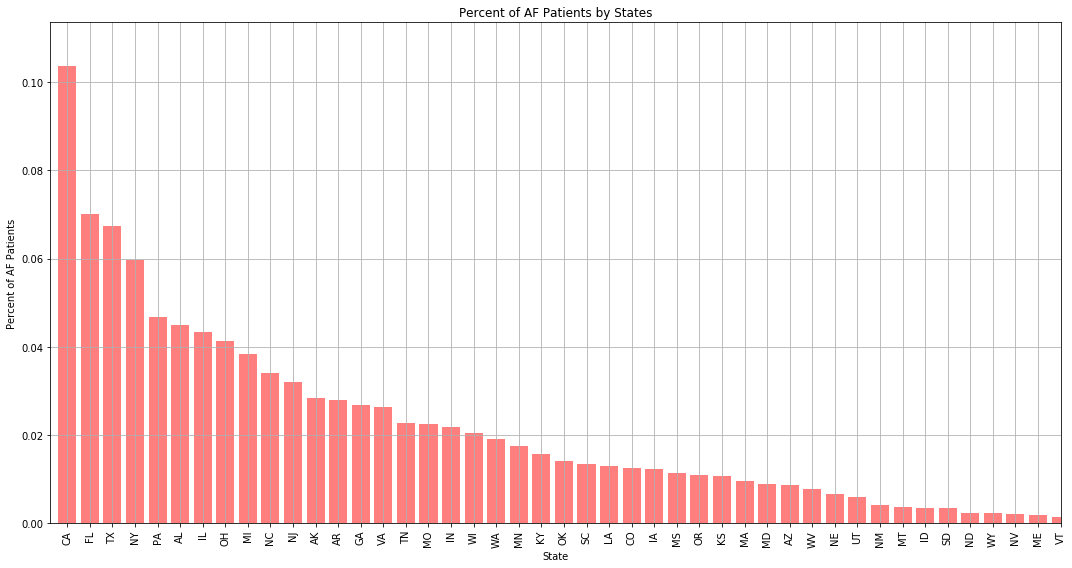

In [13]:
# Plot the Percent of AF Patients by State Locations
x_axis = np.arange(len(state))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, state["Percent"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, state["STATE"], rotation="vertical")
plt.xlim(-0.75,44)
plt.ylim(0, max(state["Percent"])+0.01)
plt.title("Percent of AF Patients by States")
plt.xlabel("State")
plt.ylabel("Percent of AF Patients")
plt.tight_layout()
plt.grid()
plt.show()

# 4 - Percent of patients based on race

In [14]:
# Find the Percent of AF Patients by Ethnicity
race = df[['DESYNPUF_ID', 'BENE_RACE_CD']]
race = race.drop_duplicates()
race = race.dropna(how='any')
race['Counts'] = race.groupby(['BENE_RACE_CD']).transform('count')
race = race.drop(columns='DESYNPUF_ID')
race = race.drop_duplicates()
race = race.sort_values('Counts', ascending=False)
race['Percent'] = race['Counts']/pt_count
race['Percent'] = race['Percent'].astype(float).map(lambda n: '{:.2%}'.format(n))
race.head(10)




,BENE_RACE_CD,Counts,Percent
0,White,58350,85.62%
2,Black,5865,8.61%
32,Other,2688,3.94%
589,Hispanic,1249,1.83%


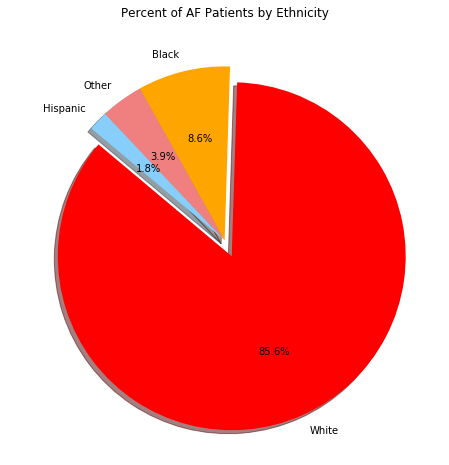

In [15]:
# Plot the Percent of AF Patients by Ethnicity
race_counts = race['Counts']
race_explode = (0.1, 0, 0, 0)
race_colors = ["red", "orange", "lightcoral", "lightskyblue"]
race_labels = race['BENE_RACE_CD']
plt.figure(figsize=(20,8))
plt.pie(race_counts, explode=race_explode, labels=race_labels, colors=race_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percent of AF Patients by Ethnicity")
plt.show()

# 5 - Total average costs spent by patients based on age groups

In [16]:
# Find the Total Average Cost Per Patient 
cost = df[['DESYNPUF_ID', 'total_costs']]
cost = cost.drop_duplicates()
cost['total_costs'].mean()

5718.412929921352

In [17]:
# Find the Total Average Cost Per Patient by Age Group 
cost = df[['DESYNPUF_ID', 'total_costs', 'age_groups']]
cost = cost.drop_duplicates()
cost = cost.dropna(how='any')
cost = cost.drop(columns='DESYNPUF_ID')
cost = cost.groupby(["age_groups"]).mean()
cost

,total_costs
age_groups,
65-69,4388.893916
70-74,5093.032332
75-79,5838.433483
80-84,6536.312102
85-90,7182.304299
90-94,7704.549835
95+,7893.399618


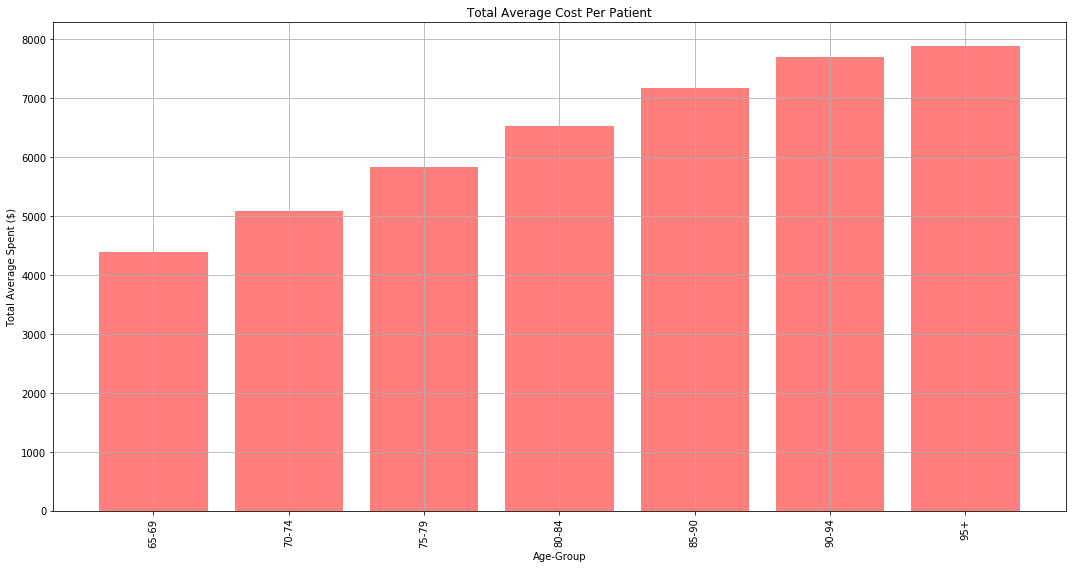

In [18]:
# Plot the Total Average Cost Per Patient by Age Group
x_axis = np.arange(len(cost))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(15,8))
plt.bar(x_axis, cost["total_costs"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, ('65-69', '70-74', '75-79', '80-84', '85-90', '90-94', '95+'), rotation="vertical")
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(cost["total_costs"])+1000)
plt.title("Total Average Cost Per Patient")
plt.xlabel("Age-Group")
plt.ylabel("Total Average Spent ($)")
plt.grid()
plt.tight_layout()

plt.show()

# 6 - Comorbid Conditions

In [19]:
# Find the Top comorbid conditions
comorb = df[['DESYNPUF_ID', 'CODE_y', 'DESCRIPTION_y']]
comorb = comorb.drop_duplicates()
comorb['Counts'] = comorb.groupby(['CODE_y', 'DESCRIPTION_y']).transform('count')
comorb = comorb.drop(columns='DESYNPUF_ID')
comorb = comorb.drop_duplicates()
comorb = comorb.sort_values('Counts', ascending=False)
comorb['Percent'] = comorb['Counts']/pt_count
comorb['Percent'] = comorb['Percent'].astype(float).map(lambda n: '{:.2%}'.format(n))
comorb = comorb[~comorb['CODE_y'].isin(diag_codes)]
comorb.head(50)

,CODE_y,DESCRIPTION_y,Counts,Percent
1317153,4019,Unspecified essential hypertension,18854.0,27.66%
1362556,25000,Diabetes mellitus without mention of complicat...,10977.0,16.11%
1346299,2724,Other and unspecified hyperlipidemia,10534.0,15.46%
1447725,4011,Benign essential hypertension,7607.0,11.16%
1279858,V5869,Long-term (current) use of other medications,7419.0,10.89%
1463365,2720,Pure hypercholesterolemia,6374.0,9.35%
1288610,V5861,Long-term (current) use of anticoagulants,6062.0,8.89%
1303999,2449,Unspecified acquired hypothyroidism,5786.0,8.49%
1379424,4280,"Congestive heart failure, unspecified",5272.0,7.74%
1486750,53081,Esophageal reflux,4948.0,7.26%


In [20]:
# Find the percent of patient which were inpatient / outpatient / both
#present = df[['DESYNPUF_ID', 'type']]
#present = present.drop_duplicates()
#present = present.dropna(how='any')
#present['Counts'] = present.groupby(['type']).transform('count')
#present = present.drop(columns='DESYNPUF_ID')
#present = present.drop_duplicates()
#present = present.sort_values('Counts', ascending=False)
#present['Percent'] = present['Counts']/pt_count
#present['Percent'] = present['Percent'].astype(float).map(lambda n: '{:.2%}'.format(n))
#present.head(50)

# 7 - Percent of patient which by gender, age-group, and race

In [21]:
age_gender_race = df[['DESYNPUF_ID', 'BENE_SEX_IDENT_CD', 'age_groups', 'BENE_RACE_CD']]
age_gender_race = age_gender_race.drop_duplicates()
age_gender_race = age_gender_race.drop(columns='DESYNPUF_ID')
age_gender_race = age_gender_race.groupby(['BENE_SEX_IDENT_CD', 'age_groups','BENE_RACE_CD']).size().to_frame('count').reset_index()
age_gender_race['Percent'] =  age_gender_race['count'] / pt_count
age_gender_race['Percent'] = age_gender_race['Percent'].astype(float).map(lambda n: '{:.2%}'.format(n))
age_gender_race

,BENE_SEX_IDENT_CD,age_groups,BENE_RACE_CD,count,Percent
0,Female,65-69,Black,786,1.15%
1,Female,65-69,Hispanic,129,0.19%
2,Female,65-69,Other,370,0.54%
3,Female,65-69,White,6747,9.90%
4,Female,70-74,Black,862,1.26%
5,Female,70-74,Hispanic,134,0.20%
6,Female,70-74,Other,407,0.60%
7,Female,70-74,White,7705,11.31%
8,Female,75-79,Black,774,1.14%
9,Female,75-79,Hispanic,146,0.21%


# 8 - Box Plot of Total Cost Per Patient By Age Group

In [22]:
# Find the Total Cost Per Patient By Age Group
file_df = final_df
age_group_df = file_df[["DESYNPUF_ID","total_costs","age_groups"]]
age_group_df = age_group_df.drop_duplicates(subset="DESYNPUF_ID", keep="first")
age_group_df = age_group_df[["age_groups","total_costs"]]
age_group_df = age_group_df.reset_index(drop=True)
age_group_df = age_group_df.pivot(columns="age_groups",values="total_costs")
age_group_df.head()

age_groups,NaN,65-69,70-74,75-79,80-84,85-90,90-94,95+
0,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN
1,NaN,2470.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,3670.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,5140.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,6934.0,NaN,NaN


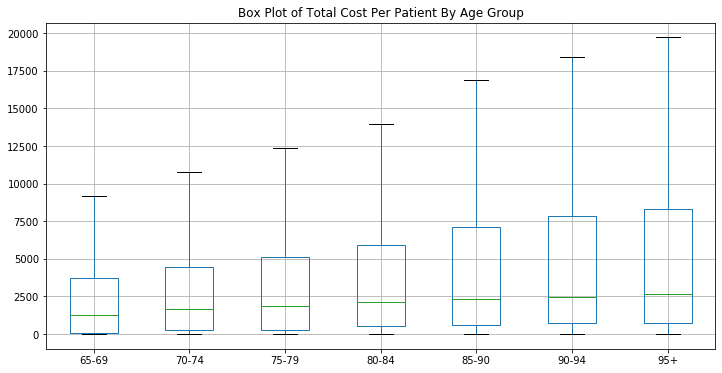

In [23]:
# Plot the Total Cost Per Patient By Age Group on a box plot
age_group_df.boxplot(showfliers=False,figsize=(12,6))
plt.title("Box Plot of Total Cost Per Patient By Age Group")
plt.xlim(1.5)
plt.show()

# 9 - Box Plot of Total Cost Per Patient By State

In [24]:
# Find the  Total Cost Per Patient By State
state_df = file_df[["DESYNPUF_ID","total_costs","STATE"]]
state_df = state_df.drop_duplicates(subset="DESYNPUF_ID", keep="first")
state_df = state_df[["STATE","total_costs"]]
state_df.sort_values(by=["STATE"])
state_df = state_df.reset_index(drop=True)
state_df = state_df.pivot(columns="STATE",values="total_costs")
state_df.head()

STATE,NaN,AK,AL,AR,AZ,CA,CO,FL,GA,IA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


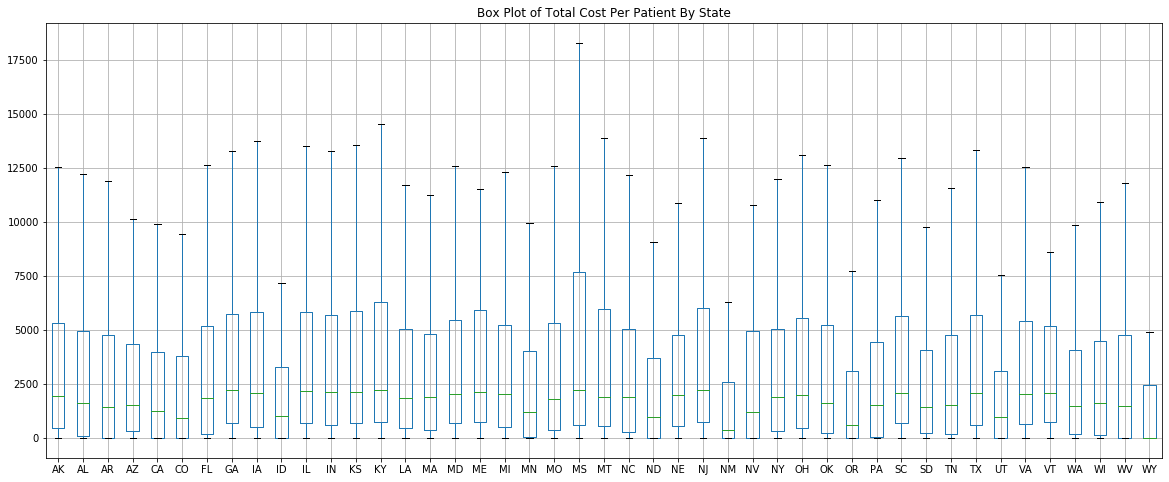

In [25]:
# Plot the total cost of patients by state on the box plot
state_df.boxplot(showfliers=False,figsize=(20,8))
plt.title("Box Plot of Total Cost Per Patient By State")
plt.xlim(1.5)
plt.show()